In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [29]:
def f_keepLargeComponents(I,th):
    R = np.zeros(I.shape)<0
    unique_labels = np.unique(I.flatten())
    for label in unique_labels:
        if label == 0:
            pass
        else:
            I2 = I==label
            if np.sum(I2)>th:
                R = R | I2
    return np.float32(255*R)

In [45]:
import cvlib as cv
from cvlib.object_detection import draw_bbox
def f_saveSeq(C,counter,th,outPutPath):
    if len(C)<th:
        pass
    else:
        k = 1
        for frame in C:
            imName = str(counter)+'_'+ str(k)+'.jpg'
            finalPath = os.path.join(outPutPath,imName)
            bbox,labels,conf = cv.detect_common_objects(frame)
            frame = draw_bbox(frame,bbox,labels,conf)
            cv2.imwrite(finalPath,frame)
            k += 1

In [42]:
def f_displaySeq(outPutPath):
    for imName in os.listdir(outPutPath):
        frame = cv2.imread(os.path.join(outPutPath,imName))
        frame = cv2.resize(frame,dsize=(600,400))
        cv2.imshow('Display',frame)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
    cv2.destroyAllWindows()

In [43]:
pth = r'C:\Users\DeLL\Desktop\ML\CV\Data\smart'
f_displaySeq(pth)

In [47]:
#imPath = r'C:\Users\DeLL\Desktop\ML\CV\Data\GroundtruthSeq\RawImages'
imPath = r'C:\Users\DeLL\Desktop\ML\CV\Data\Campus'
#imPath = r'C:\Users\DeLL\Desktop\ML\CV\Data\ShoppingMall_resized'
fgModel = cv2.createBackgroundSubtractorMOG2()
leastNumOfFrames = 5
idx = []
C = []
counter = 0
outPutPath = r'C:\Users\DeLL\Desktop\ML\CV\Data\smart2_objects'
for imName in os.listdir(imPath):
    counter += 1
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    fgmask = cv2.morphologyEx(np.float32(fgmask),cv2.MORPH_OPEN,K_r)
    num_labels,labels_im = cv2.connectedComponents(np.array(fgmask>0,np.uint8))
    fgmask = f_keepLargeComponents(labels_im,1000)
    if np.sum(fgmask)>0:
        idx.append(counter)
        C.append(frame)
    if len(idx) >= 2 and idx[-1] > idx[-2]+1:
        f_saveSeq(C,counter,leastNumOfFrames,outPutPath)
        idx = []
        C = []

    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1],F[:,:,2] = fgmask, fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('Display',F2)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
f_saveSeq(C,counter,leastNumOfFrames,outPutPath)
cv2.destroyAllWindows()
    

In [7]:
vidPath = r'C:\Users\DeLL\Desktop\ML\CV\Data\sroom4.avi'
cap = cv2.VideoCapture(vidPath)
while(1):
    ret, frame = cap.read()
    frame = cv2.resize(frame,dsize=(600,400))
    cv2.imshow('Display',frame)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [8]:
B = cv2.imread(r'C:\Users\DeLL\Desktop\ML\CV\Data\GroundtruthSeq\B.bmp')
I = cv2.imread(r'C:\Users\DeLL\Desktop\ML\CV\Data\GroundtruthSeq\I.bmp')

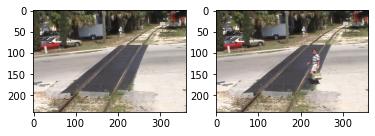

In [10]:
plt.subplot(121)
plt.imshow(B[:,:,::-1])
plt.subplot(122)
plt.imshow(I[:,:,::-1])

In [11]:
B.dtype

dtype('uint8')

In [12]:
B = np.float32(B)
I = np.float32(I)

In [13]:
C = (I-B)**2

In [14]:
C.shape

(240, 360, 3)

In [15]:
C2 = np.sum(C,axis=2)

In [16]:
C2.shape

(240, 360)

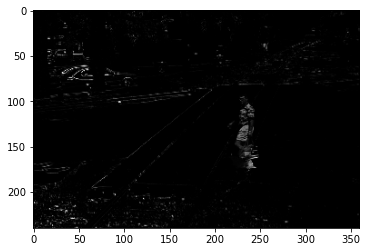

In [17]:
plt.imshow(C2,cmap='gray')

In [18]:
C2.max(),C2.mean()

(189017.0, 2068.9297)

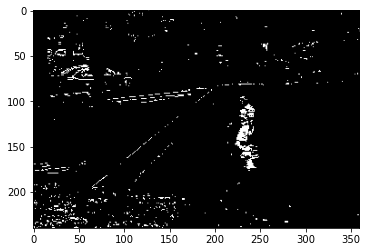

In [21]:
plt.imshow(C2>C2.mean()+2*C2.std(),cmap='gray')